In [1]:
import lightkurve as lk
from exovetter.tce import Tce
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib notebook

## Running the modshift vetter on a known exoplanet

We use the previously downloaded lightcurve and TCE of wasp 18b to run the vetter (see the TCE and lightcurve example notebook)  

In [2]:
lcf = lk.read('wasp18b_lc.fits')
lc = lcf.SAP_FLUX.remove_nans().remove_outliers()
flat = lc.flatten(window_length=81)

tce = Tce.from_json('wasp18b_tce')

/var/folders/qd/p48wml6j7313gsggzbjyyj000005fl/T/ipykernel_16905/3717360116.py:2: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcf.SAP_FLUX.remove_nans().remove_outliers()


{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<IPython.core.display.Javascript object>


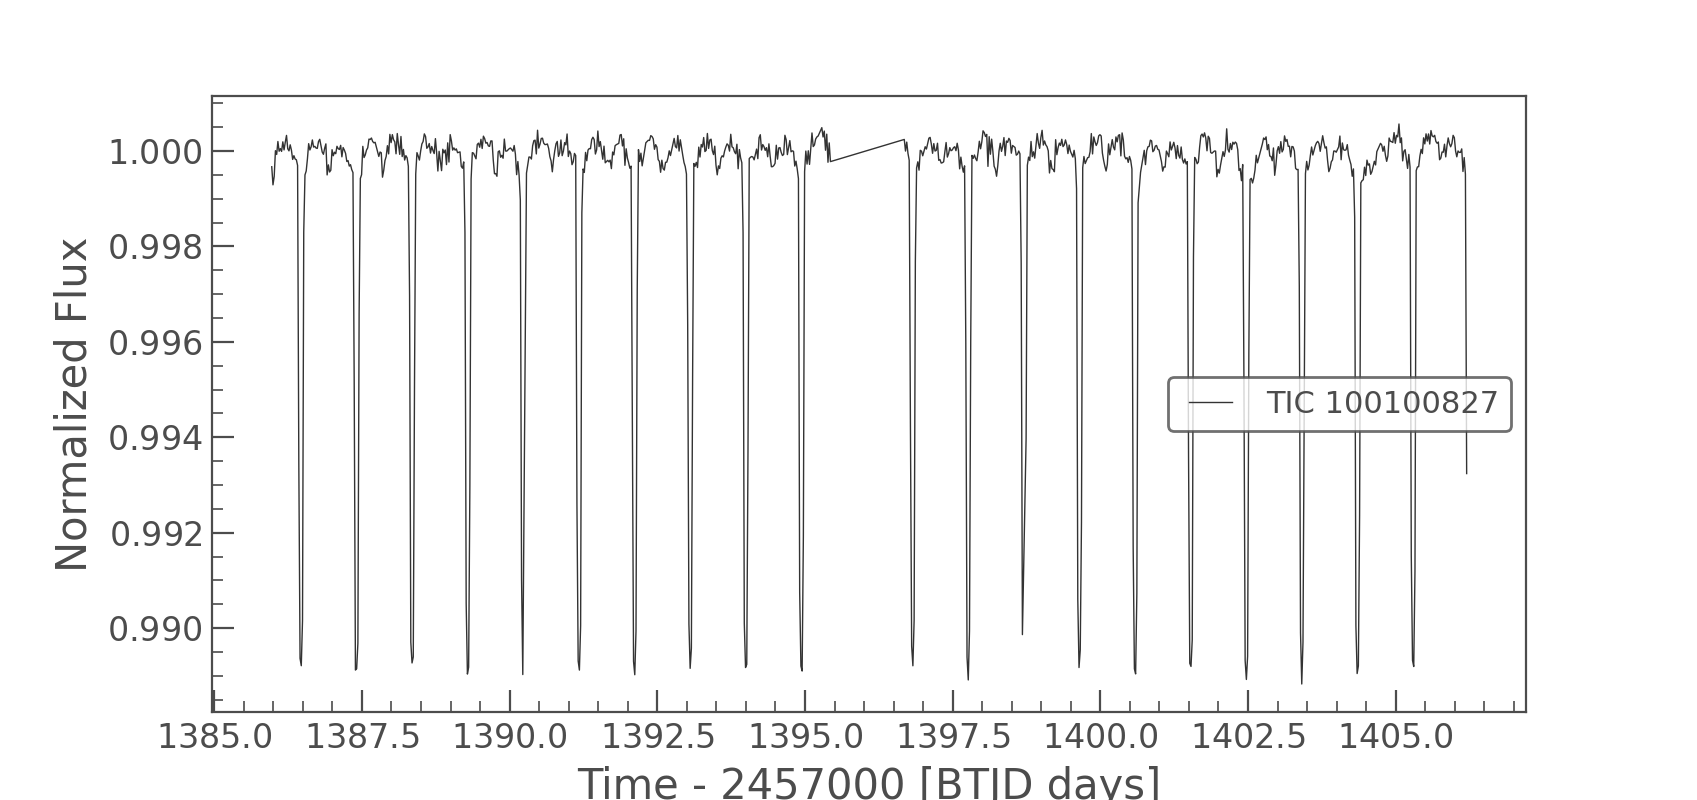

In [3]:
# View the tce and flattened lightcurve we're vetting: 
display(tce)

flat.plot()
plt.show()

## Modshift

Description

In [4]:
# We initialize the modshift object 
# using the name of whatever array we want to be flux from the light_curve object 
modshift = vet.ModShift(lc_name="flux")

# We then run the vetter on the desired TCE and lightcurve which results in a dictionary of relevent metrics
modshift_results = modshift.run(tce,flat)

print("Results from modshift:")
display(modshift_results)

Results from modshift:


{'pri': 0,
 'phase_pri': 0.0,
 'sec': 53,
 'phase_sec': 0.47520922085714284,
 'ter': 0,
 'phase_ter': 0.0,
 'pos': nan,
 'phase_pos': nan,
 'sigma_pri': MaskedNDArray(-4108.29680139),
 'sigma_sec': MaskedNDArray(-120.49168629),
 'sigma_ter': MaskedNDArray(-4108.29680139),
 'sigma_pos': nan,
 'false_alarm_threshold': 1.6702257749203022,
 'Fred': 101.60392816780762}

<IPython.core.display.Javascript object>


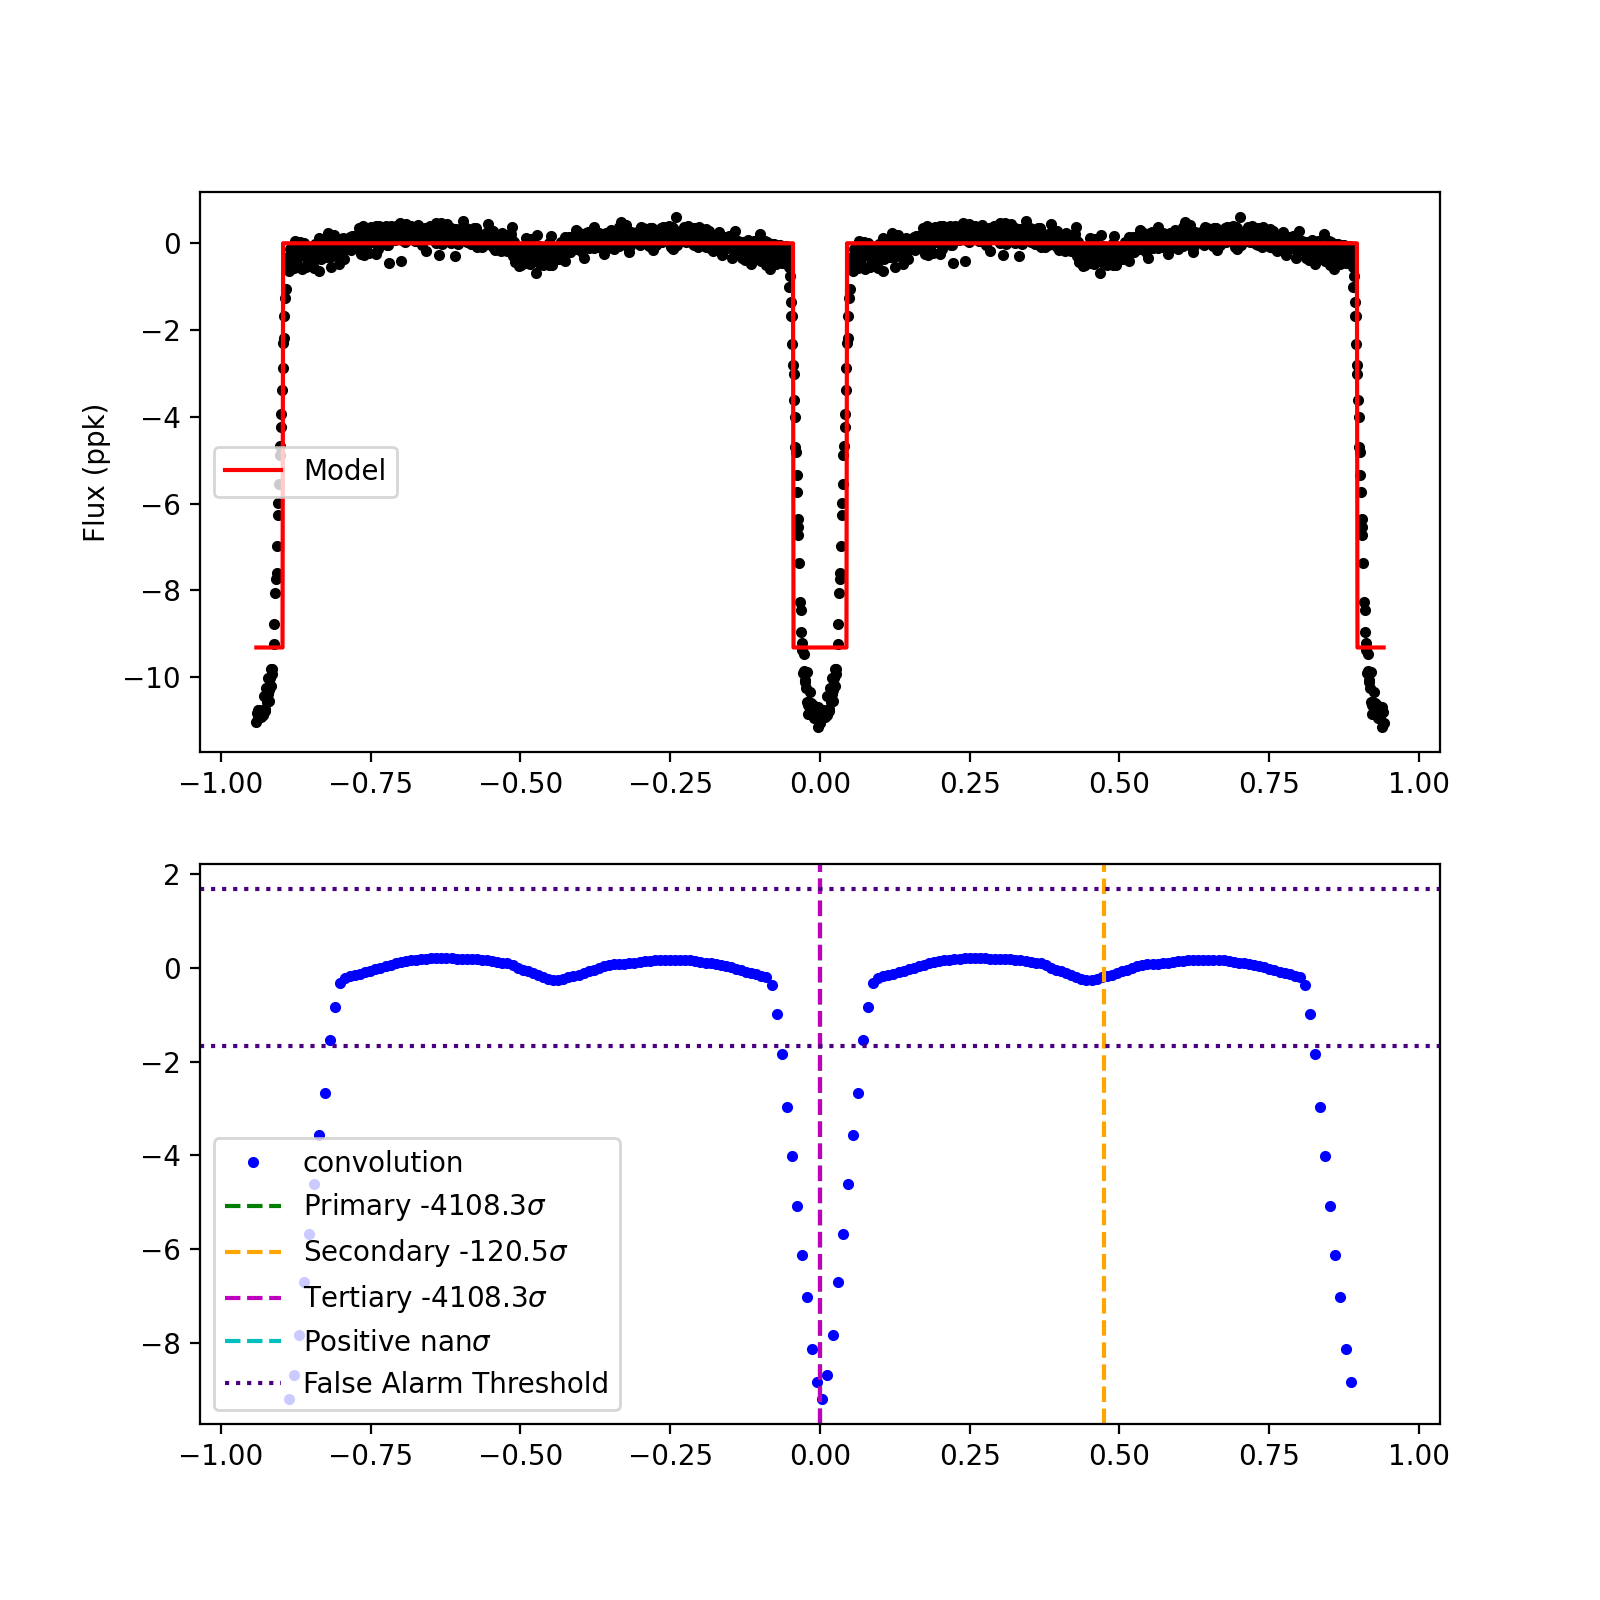

In [5]:
# We can also use the built in plot method to visualize the results
modshift.plot()

# The plot parameter can also be set to True when running the vetter, ie modshift.run(tce, flat, plot=True)
